# Dummy Q Learning

This code illustrates the fundamental structure of Q-learning, which is a typical form of reinforcement learning. However, the following algorithm does not implement fatal features like

* discounted future reward
* probabilistic outcome of action

and hence only works for totally deterministic environment.

In [1]:
import gym
import numpy as np

try:
    gym.make('FrozenLake-v3')
except:
    gym.envs.registration.register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={
            'map_name': '4x4',
            'is_slippery': False # This option is mandatory for dummy algorithm
        }
    )

In [2]:
env = gym.make('FrozenLake-v3')


Q = np.zeros((env.observation_space.n, env.action_space.n))
num_episodes = 2000

total_rewards = []
for _ in range(num_episodes):
    state = env.reset()
    done = False
    sum_rewards = 0
    while not done:
        action = np.random.choice(np.nonzero(Q[state,:] == np.max(Q[state,:]))[0])
        new_state, reward, done, info = env.step(action)    
        Q[state,action] = reward + np.max(Q[new_state, :])
        sum_rewards += reward
        state = new_state
    else:
        total_rewards.append(sum_rewards)

In [3]:
print(sum(total_rewards) / num_episodes)

0.945


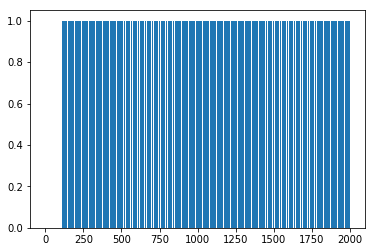

In [5]:
import matplotlib.pyplot as plt
plt.bar(list(range(len(total_rewards))), total_rewards)
plt.show()